In [10]:
import numpy as np
import pandas as pd

# Function to calculate centroids for given stops
def calculate_centroids(df, stops):
    stop_data = {stop: df[features] for stop, features in stops.items()}
    centroids = {stop: stop_data[stop].mean(axis=0) for stop in stops}
    return centroids

# Function to calculate spreads for given stops
def calculate_spreads(df, stops):
    stop_data = {stop: df[features] for stop, features in stops.items()}
    spreads = {stop: stop_data[stop].std(axis=0) for stop in stops}
    return spreads

# Function to calculate Euclidean distance between centroids of two stops
def calculate_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

# Main program
df = pd.read_csv('new_data.csv')

# Define stop features
stops = {
    'VSKP': ['Temperature_1', 'Wind_Speed_1', 'Distance_travelled_1'],
    'ANV': ['Temperature_7', 'Wind_Speed_7', 'Distance_travelled_7']
}

# Calculate centroids and spreads
centroids = calculate_centroids(df, stops)
spreads = calculate_spreads(df, stops)

# Print centroids and spreads
print("Centroids:")
for stop, centroid in centroids.items():
    print(f"{stop}: {centroid}")

print("\nSpreads:")
for stop, spread in spreads.items():
    print(f"{stop}: {spread}")

# Calculate and print Euclidean distance between centroids of 'VSKP' and 'ANV'
distance = calculate_distance(centroids['VSKP'], centroids['ANV'])
print(f"\nEuclidean distance between 'VSKP' and 'ANV' centroids: {distance:.2f}")


Centroids:
VSKP: Temperature_1           28.422192
Wind_Speed_1             2.066301
Distance_travelled_1     0.000000
dtype: float64
ANV: Temperature_7            29.038904
Wind_Speed_7              1.995068
Distance_travelled_7    114.000000
dtype: float64

Spreads:
VSKP: Temperature_1           2.228888
Wind_Speed_1            0.840584
Distance_travelled_1    0.000000
dtype: float64
ANV: Temperature_7           2.495704
Wind_Speed_7            0.834410
Distance_travelled_7    0.000000
dtype: float64

Euclidean distance between 'VSKP' and 'ANV' centroids: nan


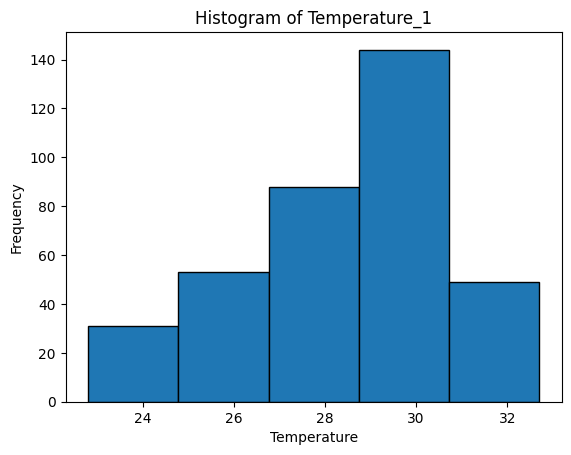

Mean of Temperature_1: 28.42
Variance of Temperature_1: 4.97


In [19]:

import matplotlib.pyplot as plt

# Function to plot histogram of a feature
def plot_histogram(feature_data, title, xlabel, ylabel):
    plt.hist(feature_data, bins=5, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Function to calculate mean and variance of a feature
def calculate_mean_variance(feature_data):
    return feature_data.mean(), feature_data.var()

# Main program
feature_data = df['Temperature_1']
plot_histogram(feature_data, 'Histogram of Temperature_1', 'Temperature', 'Frequency')

# Calculate and print mean and variance
mean, variance = calculate_mean_variance(feature_data)
print(f"Mean of Temperature_1: {mean:.2f}")
print(f"Variance of Temperature_1: {variance:.2f}")


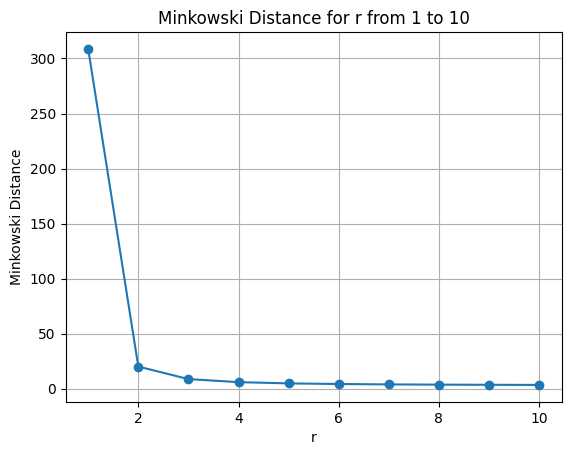

In [20]:

from scipy.spatial.distance import minkowski

# Function to calculate Minkowski distance for a range of r values
def calculate_minkowski_distances(vector1, vector2, r_values):
    return [minkowski(vector1, vector2, r) for r in r_values]

# Function to plot Minkowski distances
def plot_minkowski_distances(r_values, distances):
    plt.plot(r_values, distances, marker='o')
    plt.title('Minkowski Distance for r from 1 to 10')
    plt.xlabel('r')
    plt.ylabel('Minkowski Distance')
    plt.grid(True)
    plt.show()

# Main program
vector1 = df['Temperature_1']
vector2 = df['Temperature_7']

# Calculate Minkowski distances for r = 1 to 10
r_values = range(1, 11)
distances = calculate_minkowski_distances(vector1, vector2, r_values)

# Plot Minkowski distances
plot_minkowski_distances(r_values, distances)


In [12]:

from sklearn.model_selection import train_test_split

# Main program
X = df[['Temperature_1', 'Wind_Speed_1']]
y = df['VSKP']

# Split data and print training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)


X_train:
     Temperature_1  Wind_Speed_1
268           31.4           3.0
231           28.7           2.5
157           24.6           1.2
19            29.1           2.3
147           25.1           1.3
..             ...           ...
71            30.0           1.1
106           26.9           4.5
270           31.7           3.8
348           25.5           2.6
102           29.0           3.1

[255 rows x 2 columns]

X_test:
     Temperature_1  Wind_Speed_1
193           25.2           1.0
33            29.2           3.3
15            30.1           2.1
309           30.8           2.7
57            29.0           2.3
..             ...           ...
158           24.8           1.2
229           28.4           1.8
360           29.8           2.0
209           27.9           1.9
328           29.3           2.5

[110 rows x 2 columns]

y_train:
268    0
231    0
157    2
19     2
147    0
      ..
71     0
106    3
270    0
348    0
102    2
Name: VSKP, Length: 255, dtype: i

In [18]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

#training KNN classifier
neigh.fit(X_train, y_train)

print("kNN Classifier trained successfully.")


kNN Classifier trained successfully.


In [20]:
#accuracy of KNN classifier
accuracy = neigh.score(X_test, y_test)

print(f"Accuracy of the kNN classifier on the test set: {accuracy:.2f}")


Accuracy of the kNN classifier on the test set: 0.29


In [22]:
#predicting class labels
predictions = neigh.predict(X_test)

print("Predicted class labels for the test set:")
print(predictions)


Predicted class labels for the test set:
[1 0 0 1 2 0 0 3 0 1 0 1 3 3 0 3 0 0 0 0 1 0 2 1 0 0 1 0 0 0 0 0 1 2 0 1 2
 0 0 2 0 0 0 1 0 0 0 2 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 1 2 1 1 1 1 0 0 1 0
 0 5 0 1 1 3 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 2 0 2 0 0 1 1 0 0]


k = 1: Accuracy = 0.13
k = 2: Accuracy = 0.27
k = 3: Accuracy = 0.29
k = 4: Accuracy = 0.27
k = 5: Accuracy = 0.32
k = 6: Accuracy = 0.32
k = 7: Accuracy = 0.35
k = 8: Accuracy = 0.34
k = 9: Accuracy = 0.35
k = 10: Accuracy = 0.34
k = 11: Accuracy = 0.31


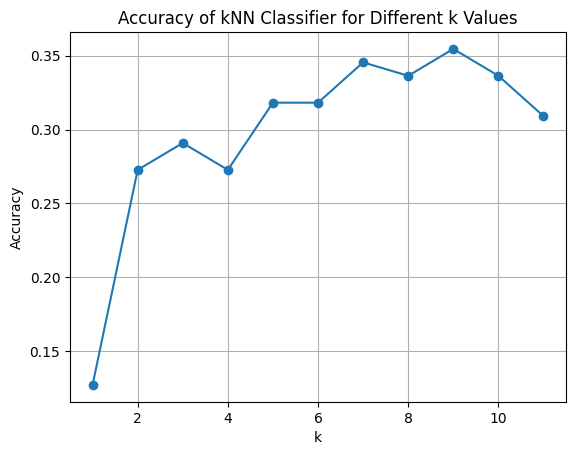

In [25]:
import matplotlib.pyplot as plt
accuracy_scores = []

#checking accuracy for different k values
for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    
    print(f"k = {k}: Accuracy = {accuracy:.2f}")
plt.plot(range(1, 12), accuracy_scores, marker='o')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

#confusion matrix of test set
conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix for the test set:")
print(conf_matrix)

#classification report for test set
print("\nClassification Report for the test set:")
print(classification_report(y_test, predictions))

train_predictions = neigh.predict(X_train)

#confusion matrix of test set
conf_matrix_train = confusion_matrix(y_train, train_predictions)
print("\nConfusion Matrix for the training set:")
print(conf_matrix_train)

#classification report for test set
print("\nClassification Report for the training set:")
print(classification_report(y_train, train_predictions))


Confusion Matrix for the test set:
[[20  9  3  1  0  0  0  0  0  0]
 [18  6  1  1  0  1  0  0  0  0]
 [17  9  4  1  0  0  0  0  0  0]
 [ 6  2  0  2  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]]

Classification Report for the test set:
              precision    recall  f1-score   support

           0       0.30      0.61      0.40        33
           1       0.21      0.22      0.22        27
           2       0.40      0.13      0.20        31
           3       0.40      0.20      0.27        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa